# MNIST-PCD
---
- 주요 피처만 압축하기

In [64]:
from keras.datasets.mnist import load_data
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 로딩

In [65]:
(X_train, y_train), (X_test, y_test) = load_data()

In [66]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리

In [67]:
X_train_reshape = X_train.reshape(-1, 28*28)
X_test_reshape = X_test.reshape(-1, 28*28)

In [68]:
X_train_scaled = X_train_reshape/255.
X_test_scaled = X_test_reshape/255.

## [3] PCA 주성분 분석

In [69]:
pca = PCA()

# 지정된 데이터에서 주성분 추출
pca.fit(X_train_scaled)

PCA()

In [ ]:
# 주성분 행렬
print("주성분 행렬 : ", pca.singular_values_)

# 주성분에 투영 후 분산 정도 설명
print("분산 정도 : ", pca.explained_variance_)

# 주성분에 투영 후 분산 정도 설명
print("분산 정도 비율 : ", pca.explained_variance_ratio_)

### [3-1] n_components = 95


In [71]:
pca1 = PCA(n_components=0.95)

pca1.fit(X_train_scaled)
X_pca1 = pca1.transform(X_train_scaled)

In [72]:
# 주성분 행렬
print("주성분 행렬 : ", pca1.singular_values_)

# 주성분에 투영 후 분산 정도 설명
print("분산 정도 : ", pca1.explained_variance_)

# 주성분에 투영 후 분산 정도 설명
print("분산 정도 비율 : ", pca1.explained_variance_ratio_)

주성분 행렬 :  [554.08236184 473.79289646 441.76832659 412.90967564 392.45954891
 369.34743738 321.72592959 302.04650943 295.59576934 273.06366032
 258.31039157 252.97700677 232.98056847 231.36547104 223.47337767
 216.59463867 204.70103539 200.98426661 193.8016728  190.95856472
 183.65236363 178.45839561 173.68452004 169.90685928 167.17214551
 162.9474728  160.33074547 157.72351701 153.49152274 147.83552759
 144.28725    143.19277799 138.07150073 136.22239172 134.28567117
 131.13991042 126.49333601 124.2313057  123.40999747 122.22992796
 120.20481924 118.62713309 115.06215042 112.23881111 110.35705642
 108.93302362 107.01475474 105.46372614 103.71956692 100.90840213
 100.45950025  99.47658474  96.76475599  95.60902108  94.8075482
  92.66540711  92.3380578   90.42557427  89.59931997  87.99801628
  87.22623816  87.0004999   85.37550857  83.71483558  82.22568067
  80.9665046   80.14523835  78.90007754  78.10823212  77.24889952
  76.90918966  75.68727777  74.94785429  74.38349456  72.41384403
 

In [73]:
len(pca1.explained_variance_)

154

### [3-2] n_components = 50

In [92]:
pca2 = PCA(n_components=0.5)
pca2.fit(X_train_scaled)
X_pca2 = pca2.transform(X_train_scaled)

In [93]:
# 주성분 행렬
print("주성분 행렬 : ", pca2.singular_values_)

# 주성분에 투영 후 분산 정도 설명
print("분산 정도 : ", pca2.explained_variance_)

# 주성분에 투영 후 분산 정도 설명
print("분산 정도 비율 : ", pca2.explained_variance_ratio_)

주성분 행렬 :  [554.08236184 473.79289646 441.76832659 412.90967564 392.45954891
 369.34743738 321.72592959 302.04650943 295.59576934 273.06366032
 258.31039157]
분산 정도 :  [5.11687301 3.74139084 3.25270845 2.8416207  2.56711774 2.27366339
 1.72515498 1.52056024 1.45630525 1.24275009 1.11208951]
분산 정도 비율 :  [0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919 ]


In [94]:
len(pca2.explained_variance_)

11

## [4] 이미지로 비교하기

In [95]:
# 이미지 복구하기
X_pca1_inverse = pca1.inverse_transform(X_pca1)
X_pca2_inverse = pca2.inverse_transform(X_pca2)

In [99]:
 def draw_img(num:int):
    # 원래 이미지
    plt.figure(figsize=(8, 3))
    plt.subplot(1 ,3 ,1)
    plt.imshow(X_train[num], cmap="gray")

    # 95 복구한 이미지
    plt.subplot(1 ,3 ,2)
    plt.imshow(X_pca1_inverse[num].reshape(28,28), cmap="gray")

    # 50 복구한 이미지
    plt.subplot(1 ,3 ,3)
    plt.imshow(X_pca2_inverse[num].reshape(28,28), cmap="gray")

    plt.show()

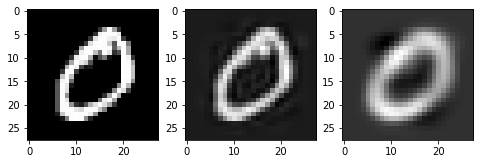

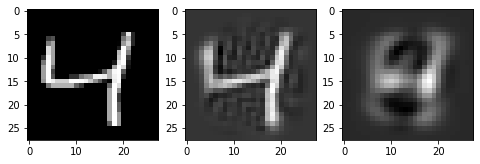

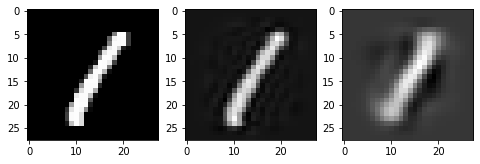

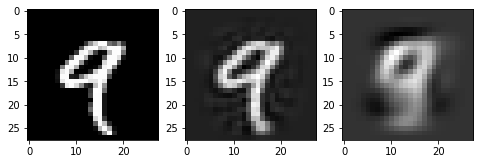

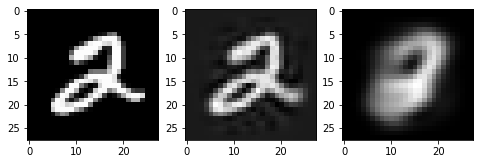

In [100]:
for i in range(1,6):
    draw_img(i)